# Breast Cancer Detection Model using CNNs

## 1.Importing the necessary libraries

In [7]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached h5py-3.8.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached grpcio-1.54.0-cp39-cp39-win_amd64.whl (4.1 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached scipy-1.10.1-cp39-cp39-win_amd64.whl (42.5 MB)
  Using cached ml_dtypes-0.1.0-cp39-cp39-win_amd64.whl (120 kB)
  Using cached requests-2.29.0-py3-none-any.whl (62 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any

In [8]:
import tensorflow as tf
from tensorflow.keras import regularizers
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

## 2.Loading the data into pandas dataframe

In [13]:
#benign cancer data set loading

INPUT_SHAPE = (64,64)
data_set_benign = []
data_dir = r"C:\Users\SAHIL\Downloads\BioGenesis-main\archive\Dataset_BUSI_with_GT\benign"
for file_name in os.listdir(data_dir):
    img = cv2.imread(os.path.join(data_dir, file_name))
    img = cv2.resize(img,INPUT_SHAPE)
    data_set_benign.append(np.array(img))
print(len(data_set_benign))
len(data_set_benign)

891


891

In [14]:
# Malignant cancer data set loading

data_set_malignant = []
data_dir1 = r"C:\Users\SAHIL\Downloads\BioGenesis-main\archive\Dataset_BUSI_with_GT\malignant"
for file_name in os.listdir(data_dir1):
    img = cv2.imread(os.path.join(data_dir1, file_name))
    img = cv2.resize(img,INPUT_SHAPE)
    data_set_malignant.append(np.array(img))
len(data_set_malignant)

421

In [15]:
# Normal cells data set loading 
data_set_normal = []
data_dir2 = r"C:\Users\SAHIL\Downloads\BioGenesis-main\archive\Dataset_BUSI_with_GT\normal"
for file_name in os.listdir(data_dir2):
    img = cv2.imread(os.path.join(data_dir2, file_name))
    img = cv2.resize(img,INPUT_SHAPE)
    data_set_normal.append(np.array(img))
len(data_set_normal)

266

## 3.Visualizing the data 

### Normal breast image & mask

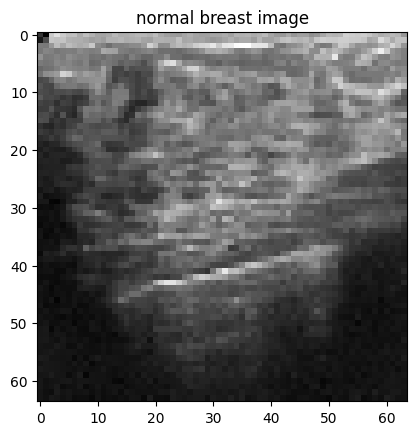

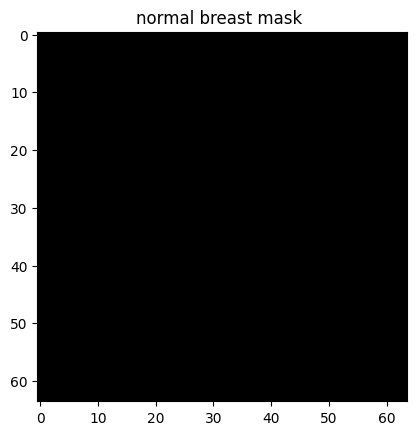

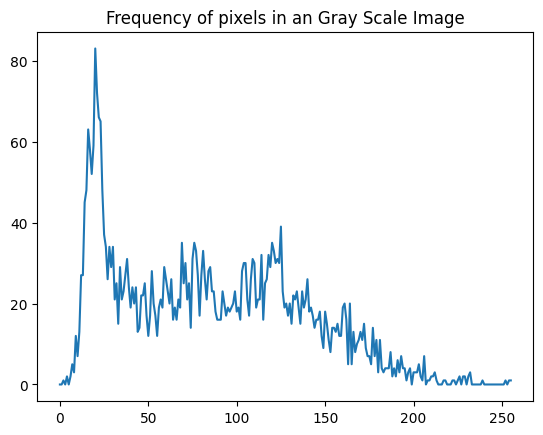

In [16]:
plt.figure()
plt.imshow(data_set_normal[0])
plt.title("normal breast image")
plt.savefig('normal.jpg',bbox_inches='tight', dpi=150)
plt.figure()
plt.imshow(data_set_normal[1])
plt.title("normal breast mask ")
plt.savefig('normalMask.jpg',bbox_inches='tight', dpi=150)
plt.figure()
histr = cv2.calcHist([data_set_normal[0]],[0],None,[256],[0,256])
plt.plot(histr)
plt.title("Frequency of pixels in an Gray Scale Image")
plt.savefig('NormalPixelFreq.jpg',bbox_inches='tight', dpi=250)
plt.show()

###  Benign breast cancer & Mask

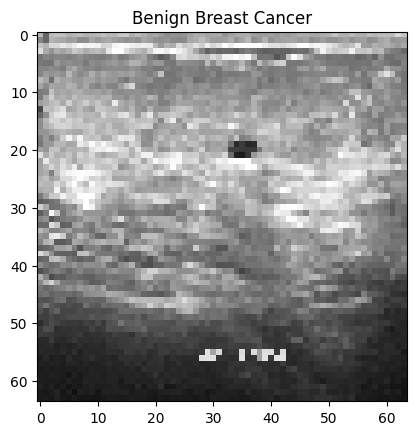

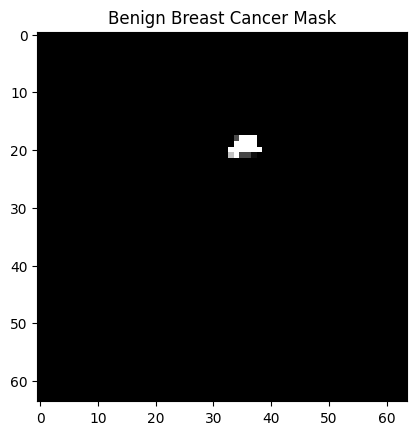

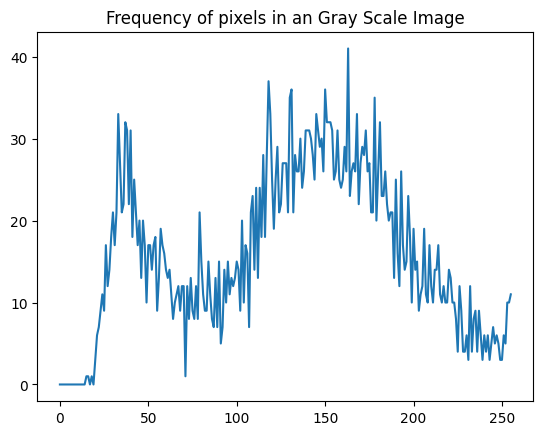

In [17]:
plt.figure()
plt.imshow(data_set_benign[0])
plt.title("Benign Breast Cancer")
plt.savefig('beingn.jpg',bbox_inches='tight', dpi=150)
plt.figure()
plt.imshow(data_set_benign[1])
plt.title("Benign Breast Cancer Mask")
plt.savefig('beingnMask.jpg',bbox_inches='tight', dpi=150)
plt.figure()
histr1 = cv2.calcHist([data_set_benign[0]],[0],None,[256],[0,256])
plt.plot(histr1)
plt.title("Frequency of pixels in an Gray Scale Image")
plt.savefig('benignFreqPixels',bbox_inches='tight', dpi=150)
plt.show()

### Malignant breast cancer & Mask

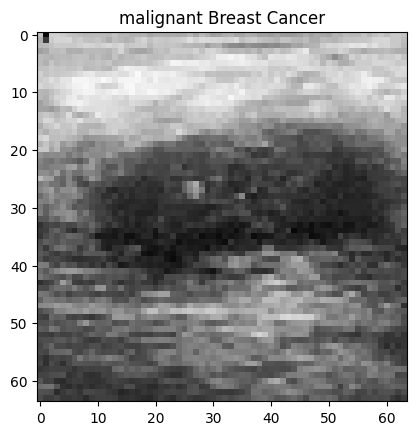

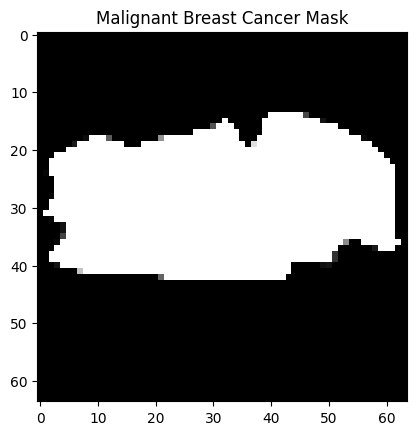

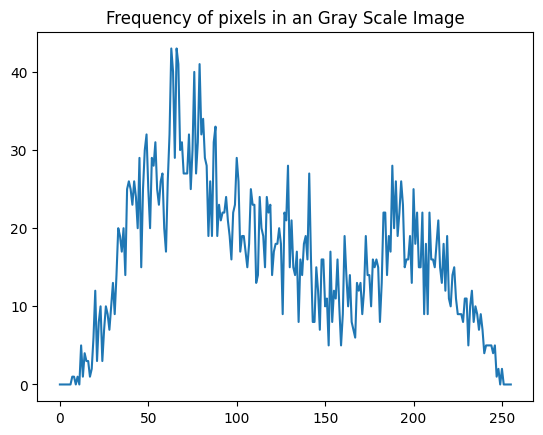

In [18]:
plt.figure()
plt.imshow(data_set_malignant[0])
plt.title("malignant Breast Cancer")
plt.savefig('malignant.jpg',bbox_inches='tight', dpi=150)
plt.figure()
plt.imshow(data_set_malignant[1])
plt.title("Malignant Breast Cancer Mask")
plt.savefig('malignantMask.jpg',bbox_inches='tight', dpi=150)
plt.figure()
histr2 = cv2.calcHist([data_set_malignant[0]],[0],None,[256],[0,256])
plt.plot(histr2)
plt.title("Frequency of pixels in an Gray Scale Image")
plt.savefig('MAlignantFreqPixels.jpg',bbox_inches='tight', dpi=150)
plt.show()

### Visulalizing the balance of the dataset 

First of all the data set was not balanced, and it had slightly very small number of images.
I managed to solve both of these problems using keras image augmentation techniqeus in a separate notebook to make this notebook clear enough
The balancing of the images to be identically balanced was difficult for me so I decided to balance as much as I could resulting in the folowing chart. 

#### Chart Expressing the balance of the dataset after performing image augmentation

In [20]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


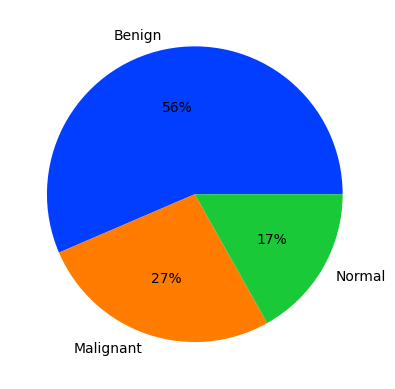

In [21]:
import seaborn
palette_color = seaborn.color_palette('bright')
plt.pie([len(data_set_benign),len(data_set_malignant), len(data_set_normal)], labels=["Benign", "Malignant", "Normal"], colors=palette_color, autopct='%.0f%%')
plt.savefig('pieChart.jpg',bbox_inches='tight', dpi=150)

The above plot shows that our data us not balanced this may lead to some bias towards the benign

## Preprocessing the data

In [22]:
#concatenating all the cancerous images
data_set_cancer = np.concatenate((data_set_benign, data_set_malignant))

In [23]:
#check size
len(data_set_cancer)==(len(data_set_benign)+len(data_set_malignant))

True

In [24]:
#check type
type(data_set_cancer[0])

numpy.ndarray

In [25]:
#check shape
data_set_cancer[0].shape

(64, 64, 3)

In [26]:
#creating labels for the cancerous images
label = np.ones((len(data_set_cancer),), dtype=int)
len(label)==len(data_set_cancer)

True

In [27]:
#check labels shape
label.shape

(1312,)

In [28]:
#creating a label for non-cancerous
non_cancer_label = np.zeros((len(data_set_normal),), dtype=int)
non_cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [29]:
type(non_cancer_label)==type(label)

True

In [30]:
# concatenating labels and non_cancer_labels
#concatenating non-cancerous images to cancerous images
targets = np.concatenate((label, non_cancer_label))
data_set_all = np.concatenate((data_set_cancer, data_set_normal))
len(targets)==len(data_set_all)

True

In [31]:
len(data_set_all)

1578

In [32]:
del data_set_normal, data_set_malignant, data_set_benign, data_set_cancer, label,non_cancer_label

In [33]:
#target dataset containg the labels for each input
targets

array([1, 1, 1, ..., 0, 0, 0])

In [34]:
#final datset contaiing input images for all classes
data_set_all

array([[[[183, 183, 183],
         [101, 101, 101],
         [188, 188, 188],
         ...,
         [190, 190, 190],
         [217, 217, 217],
         [196, 196, 196]],

        [[134, 134, 134],
         [102, 102, 102],
         [179, 179, 179],
         ...,
         [150, 150, 150],
         [153, 153, 153],
         [156, 156, 156]],

        [[195, 195, 195],
         [180, 180, 180],
         [216, 216, 216],
         ...,
         [166, 166, 166],
         [153, 153, 153],
         [168, 168, 168]],

        ...,

        [[ 33,  33,  33],
         [ 26,  26,  26],
         [ 34,  34,  34],
         ...,
         [ 20,  20,  20],
         [ 21,  21,  21],
         [ 21,  21,  21]],

        [[ 27,  27,  27],
         [ 23,  23,  23],
         [ 29,  29,  29],
         ...,
         [ 25,  25,  25],
         [ 30,  30,  30],
         [ 16,  16,  16]],

        [[ 26,  26,  26],
         [ 27,  27,  27],
         [ 24,  24,  24],
         ...,
         [ 26,  26,  26],
        

## 3.Splitting the data into training and testing data using scikit-learn

In [39]:
pip install scikit-learn

     ---------------------------------------- 8.4/8.4 MB 5.5 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data_set_all, targets, test_size=0.3, random_state=42)

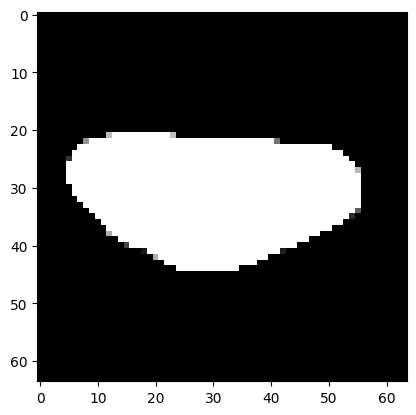

(64, 64, 3)

In [41]:
#show an image of the training data to make sure there is nothing wrong
plt.imshow(x_train[0])
plt.show()
y_train[0]
x_train[1000].shape

## 4.Building the model

In [42]:
model=Sequential()

# 1st conv2D layer
model.add(Conv2D(64,(3,3), padding="same",input_shape=(64,64,3)))
model.add(Activation("relu"))


# 2st conv2D layer
model.add(Conv2D(64,(3,3), padding="same",input_shape=(64,64,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd conv2D layer
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))



# 4th conv2D layer
model.add(Conv2D(128,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#5th
model.add(Conv2D(256,(3,3), padding="same"))
model.add(Activation("relu"))

#6th
model.add(Conv2D(256,(3,3), padding="same"))
model.add(Activation("relu"))

#7th
model.add(Conv2D(256,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


#8th
model.add(Conv2D(512,(3,3), padding="same"))
model.add(Activation("relu"))

#9th
model.add(Conv2D(512,(3,3), padding="same"))
model.add(Activation("relu"))

#10th
model.add(Conv2D(512,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


#falttenning 
model.add(Flatten())

#dense layer
model.add(Dense(4096))
model.add(Activation('relu'))

#regularization layer
model.add(Dropout(0.5))

#output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

### Plotting function that creats the results plots

In [43]:
def tr_plot(tr_data, start_epoch):
    #Plot the loss and accuracy curve
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    plt.savefig('ssa.jpg')
    plt.show()

In [44]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=100,verbose=1,epochs=20
          , validation_data=(x_test,y_test),
          shuffle=False)
# plot the history
#tr_plot(history,0)

Epoch 1/20
12/12 [==============================] - 26s 2s/step - loss: 10.2100 - accuracy: 0.7754 - val_loss: 0.5200 - val_accuracy: 0.8376
Epoch 2/20
12/12 [==============================] - 25s 2s/step - loss: 0.3219 - accuracy: 0.8804 - val_loss: 0.2596 - val_accuracy: 0.9262
Epoch 3/20
12/12 [==============================] - 26s 2s/step - loss: 0.2657 - accuracy: 0.9112 - val_loss: 0.2586 - val_accuracy: 0.9262
Epoch 4/20
12/12 [==============================] - 28s 2s/step - loss: 0.2269 - accuracy: 0.9112 - val_loss: 0.1994 - val_accuracy: 0.9262
Epoch 5/20
12/12 [==============================] - 28s 2s/step - loss: 0.1932 - accuracy: 0.9112 - val_loss: 0.2210 - val_accuracy: 0.9262
Epoch 6/20
12/12 [==============================] - 28s 2s/step - loss: 0.1907 - accuracy: 0.9139 - val_loss: 0.1789 - val_accuracy: 0.9262
Epoch 7/20
12/12 [==============================] - 28s 2s/step - loss: 0.1805 - accuracy: 0.9112 - val_loss: 0.1690 - val_accuracy: 0.9262
Epoch 8/20
12/12 [=

## 5.Results

Plotting the training and validation loss curves &
Plotting the training and validaiton accuracy 

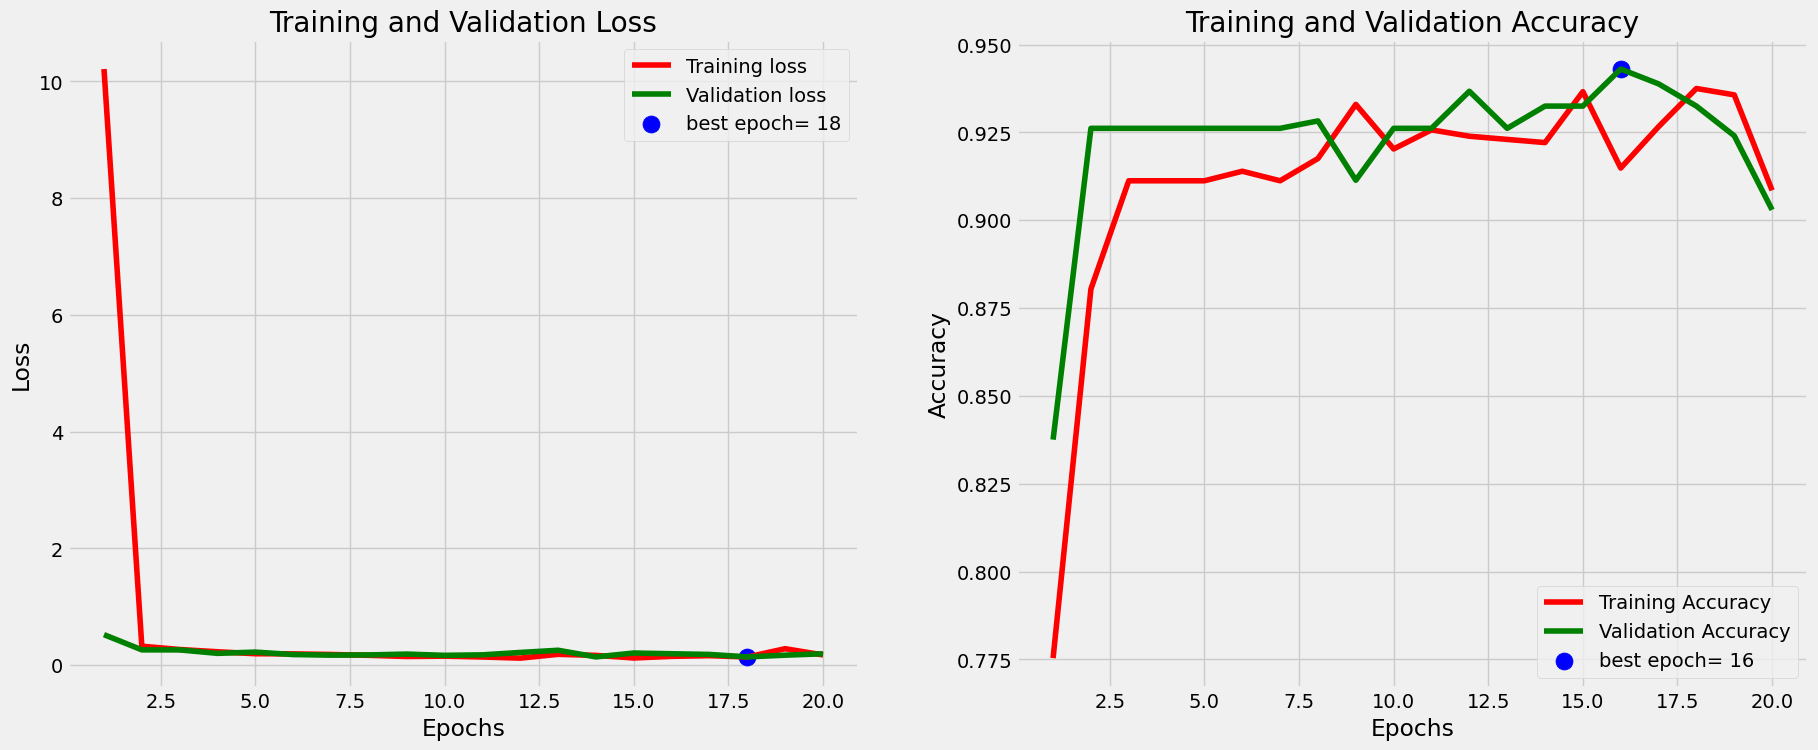

In [45]:
tr_plot(history,0)

Showing the model summary 

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       73856     
                                                        

saving the model summary as a text file

In [47]:
"""with open('modelsummary2.txt', 'w') as f:

    model.summary(print_fn=lambda x: f.write(x + '\n'))"""

"with open('modelsummary2.txt', 'w') as f:\n\n    model.summary(print_fn=lambda x: f.write(x + '\n'))"

The model gives a training accuracy of 97.13% and validation accuracy 95.20% this is a high accuracy and I think it can be better if I managed to make the set more balanced 
the loss is quite impressive around 0.07 for training and 0.14 for validation